In [210]:
# You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. 
# All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql.expression import func

#import libraries to use

import pandas as pd
import matplotlib as plt

In [211]:
# Choose a start date and end date for your trip. 
# Make sure that your vacation range is approximately 3-15 days total.

start = "2017-07-25"
end = "2017-08-01"



In [212]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [213]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [214]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [215]:
session = Session(engine)

In [216]:
all_measure = session.query(Measurement).all()
len(all_measure), type(all_measure)

(18103, list)

In [217]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.
import datetime as dt

percipitation= session.query(Measurement.date, Measurement.prcp).filter(Measurement.station == "USC00519281").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()
percipitation

[('2016-10-31', 0.07),
 ('2016-11-01', 0.1),
 ('2016-11-02', 0),
 ('2016-11-03', 0),
 ('2016-11-04', 0),
 ('2016-11-05', 0.03),
 ('2016-11-06', 0.01),
 ('2016-11-07', 0),
 ('2016-11-08', 0.21),
 ('2016-11-09', 0.11),
 ('2016-11-10', 0),
 ('2016-11-11', 0),
 ('2016-11-12', 0),
 ('2016-11-13', 0),
 ('2016-11-14', 0),
 ('2016-11-15', 0),
 ('2016-11-16', 0.24),
 ('2016-11-17', 0.01),
 ('2016-11-18', 0),
 ('2016-11-19', 0.11),
 ('2016-11-20', 0.39),
 ('2016-11-21', 0.11),
 ('2016-11-22', 2.05),
 ('2016-11-23', 0.25),
 ('2016-11-24', 0.3),
 ('2016-11-25', 0.08),
 ('2016-11-26', 0.06),
 ('2016-11-27', 0.17),
 ('2016-11-28', 0),
 ('2016-11-29', 0.09),
 ('2016-11-30', 0.05),
 ('2016-12-01', 0.37),
 ('2016-12-02', 0.35),
 ('2016-12-03', 0.77),
 ('2016-12-04', 0.04),
 ('2016-12-05', 0.22),
 ('2016-12-06', 0),
 ('2016-12-07', 0.12),
 ('2016-12-08', 0.07),
 ('2016-12-09', 0.31),
 ('2016-12-10', 0.02),
 ('2016-12-11', 0),
 ('2016-12-12', 0),
 ('2016-12-13', 0.04),
 ('2016-12-14', 0.92),
 ('2016-12-1

In [218]:
# http://pbpython.com/pandas-list-dict.html
# Load the query results into a Pandas DataFrame and set the index to the date column.

label = ["date", "Prcp"]
precipitation = pd.DataFrame.from_records(result,columns = label).set_index('date', drop=True)
precipitation

,Prcp
date,
2016-10-30,0.16
2016-10-31,0.07
2016-11-01,0.10
2016-11-02,0.00
2016-11-03,0.00
2016-11-04,0.00
2016-11-05,0.03
2016-11-06,0.01
2016-11-07,0.00


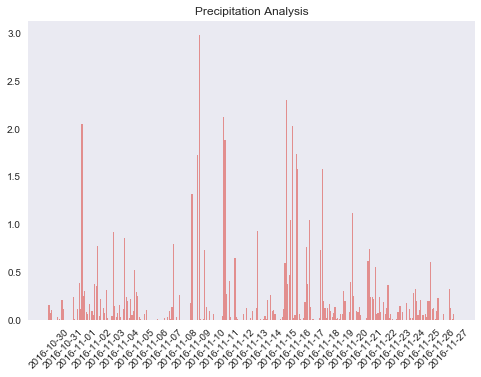

In [219]:
# Plot the results using the DataFrame plot method.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = ["LightCoral", "LightSkyBlue", "Gold"]
sns.set_palette(colors,3,0.75)


value={"Prcp":precipitation["Prcp"]}
x = range(len(precipitation.index.values))
y = precipitation["Prcp"]
plt.bar(x, y ,align = "center")
labels = precipitation.index.values
plt.xticks(range(len(precipitation.index.values)), labels, rotation=45)
plt.title("Precipitation Analysis")
#you can change the nbins to whatever number and it will change the ticks
plt.grid()
plt.locator_params(nbins=30, axis= "x")


plt.show()


In [220]:
# station analysis

# Design a query to calculate the total number of stations.
station_num= session.query(Station.station).count()

station_num

9

In [221]:
station_num2 = session.query(Measurement.station).group_by(Measurement.station).count()
station_num2

9

In [222]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
# Which station has the highest number of observations?


base_query = session.query(Measurement.station, func.count(Measurement.tobs).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

base_query

# USC00519281 has the highest observations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [223]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.


tobs_12month= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()

tobs_12month

[('2016-10-31', 76),
 ('2016-11-01', 74),
 ('2016-11-02', 75),
 ('2016-11-03', 75),
 ('2016-11-04', 75),
 ('2016-11-05', 75),
 ('2016-11-06', 71),
 ('2016-11-07', 63),
 ('2016-11-08', 70),
 ('2016-11-09', 68),
 ('2016-11-10', 67),
 ('2016-11-11', 77),
 ('2016-11-12', 74),
 ('2016-11-13', 77),
 ('2016-11-14', 76),
 ('2016-11-15', 76),
 ('2016-11-16', 75),
 ('2016-11-17', 76),
 ('2016-11-18', 75),
 ('2016-11-19', 73),
 ('2016-11-20', 75),
 ('2016-11-21', 73),
 ('2016-11-22', 75),
 ('2016-11-23', 74),
 ('2016-11-24', 75),
 ('2016-11-25', 74),
 ('2016-11-26', 75),
 ('2016-11-27', 73),
 ('2016-11-28', 75),
 ('2016-11-29', 73),
 ('2016-11-30', 73),
 ('2016-12-01', 74),
 ('2016-12-02', 70),
 ('2016-12-03', 72),
 ('2016-12-04', 70),
 ('2016-12-05', 67),
 ('2016-12-06', 67),
 ('2016-12-07', 69),
 ('2016-12-08', 70),
 ('2016-12-09', 68),
 ('2016-12-10', 69),
 ('2016-12-11', 69),
 ('2016-12-12', 66),
 ('2016-12-13', 65),
 ('2016-12-14', 68),
 ('2016-12-15', 62),
 ('2016-12-16', 75),
 ('2016-12-17

In [224]:
# Plot the results as a histogram with bins=12.
# Clarification added by pavan on wed oct 18 8:35 pm
# # Choose the station with the highest number of temperature observations.
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
label2 = ["date", "tobs"]
tobs = pd.DataFrame.from_records(tobs_12month,columns = label2).set_index('date', drop=True)
tobs


,tobs
date,
2016-10-31,76
2016-11-01,74
2016-11-02,75
2016-11-03,75
2016-11-04,75
2016-11-05,75
2016-11-06,71
2016-11-07,63
2016-11-08,70


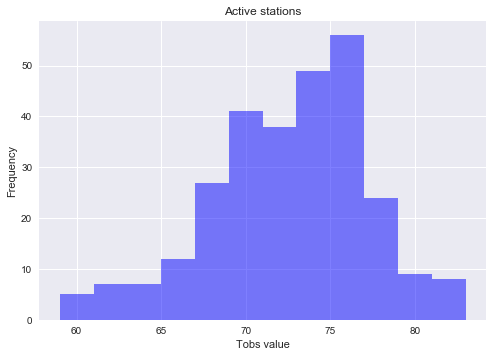

In [225]:
# Plot the results as a histogram with bins=12.
x = tobs["tobs"]
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title("Active stations")
plt.xlabel("Tobs value")
plt.ylabel("Frequency")
plt.show()


In [226]:
start1 = "2017-07-25"
end1 = "2017-07-26"
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()
temp

[('USC00519397', '2017-07-25', 80),
 ('USC00519397', '2017-07-26', 82),
 ('USC00513117', '2017-07-25', 78),
 ('USC00513117', '2017-07-26', 78),
 ('USC00514830', '2017-07-25', 80),
 ('USC00514830', '2017-07-26', 79),
 ('USC00517948', '2017-07-25', 81),
 ('USC00519523', '2017-07-25', 80),
 ('USC00519523', '2017-07-26', 84),
 ('USC00519281', '2017-07-25', 77),
 ('USC00519281', '2017-07-26', 75),
 ('USC00516128', '2017-07-25', 79),
 ('USC00516128', '2017-07-26', 73)]

In [227]:
tem= session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()
tem

[(78.92307692307692)]

In [228]:
# Temperature Analysis
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temp (start, end):
    
#     temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()
    max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()
    diff_temp = session.query(func.max(Measurement.tobs)-func.min(Measurement.tobs)).filter(Measurement.date >= start1).filter(Measurement.date <= end1).all()

    return min_temp, max_temp, avg_temp, diff_temp
    
temperature = calc_temp(start1, end1)
temperature

([(73)], [(84)], [(78.92307692307692)], [(11)])

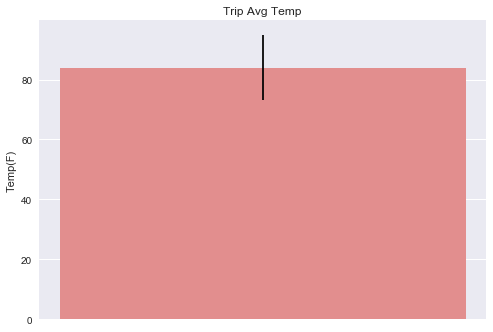

In [229]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


data =   temperature[1]
error =  temperature[3]
xlocations = 0.5
width = 0.25

plt.bar(xlocations, data[0], width=width , yerr=error[0])

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")

plt.show()


In [230]:
# Now that you have completed your initial analysis, 
# design a Flask api based on the queries that you have just developed.

from flask import Flask

# 2. Create an app, being sure to pass __name__
# Invoke the flask function to create the application end point
app = Flask(__name__)

In [231]:
# 3. Define what to do when a user hits the index route
# Index page localhost:5000/

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end><br/>"
    )

In [232]:
# add new route
# Query for the dates and precipitation observations from the last year.
# Convert the query results to a Dictionary using date as the key and tobs as the value.
# Return the json representation of your dictionary.


@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return precipitation observations from the last year."""
    # Query all passengers
    percipitation= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()


    # Convert the query results to a Dictionary using date as the key and tobs as the value.
    all_percipitation = []
    for per in percipitation:
        passenger_dict = {}
        passenger_dict["date"] = passenger.tobs
        all_percipitation.append(passenger_dict)

    return jsonify(all_passengers)

In [233]:
# add new route

@app.route("/api/v1.0/tobs")
def tobs():
    """Return a json list of Temperature Observations (tobs) for the previous year"""
      # Query all station name
    tobs_12month= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()

    # Convert list of tuples into normal list
    all_names1 = list(np.ravel(tobs_12month))

    return jsonify(all_names1)


In [234]:
@app.route("/api/v1.0/stations")
def stations():
    """Return a json list of stations from the dataset."""
    # Query all station
    station_sum= session.query(Station.station).all()

    # Convert list of tuples into normal list
    all_names2 = list(np.ravel(station_sum))

    return jsonify(all_names2)


In [ ]:
@app.route("/api/v1.0/<start>")
def temperature(start):
    """Return precipitation observations from the last year."""
    # Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
    # When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.

    end = dt.date.today()
    temperature = calc_temp(start, end)

    # Convert the query results to a Dictionary using date as the key and tobs as the value.
    all_temp = []
    for temp in temperature:
        passenger_dict = {}
        passenger_dict["TMIN"] = temperature[0]
        passenger_dict["TMAX"] = temperature[1]
        passenger_dict["TAVG"] = temperature[2]
        all_temp.append(passenger_dict)

    return jsonify(all_temp)

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def temperature_end(start):
    """Return precipitation observations from the last year."""
    # Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
    # When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.

    temperature = calc_temp(start, end)

    # Convert the query results to a Dictionary using date as the key and tobs as the value.
    all_temp = []
    for temp in temperature:
        passenger_dict = {}
        passenger_dict["TMIN"] = temperature[0]
        passenger_dict["TMAX"] = temperature[1]
        passenger_dict["TAVG"] = temperature[2]
        all_temp.append(passenger_dict)

    return jsonify(all_temp)

In [235]:
if __name__ == '__main__':
    app.run(debug=True)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/milliemillie/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
